## Vazualize cars dataset

Import libraries and Setup the API keys:

In [1]:
# !pip install tiktoken
import os
import pandas as pd
import evadb
os.environ['OPENAI_API_KEY'] = 'sk-xxx'

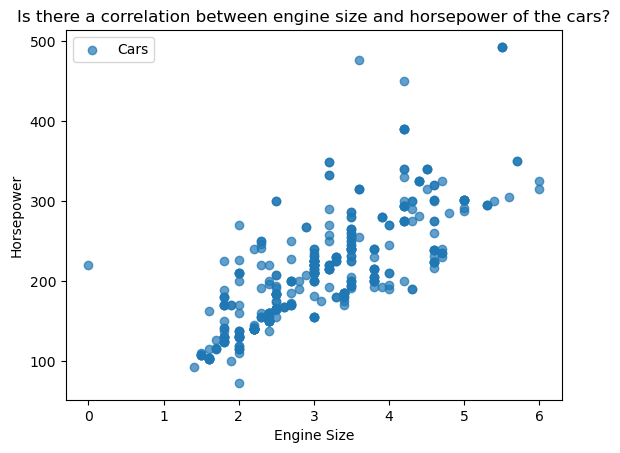

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# plan -
# 1. Use scatter plot to visualize the correlation between engine size and horsepower.
# 2. Extract 'engine_size' and 'horsepower' columns from the dataset.
# 3. Apply necessary transformations if needed (no transformation needed in this case).
data = pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars_full.csv')

def plot(data: pd.DataFrame):
    # <imports>
    
    # <stub>
    plt.scatter(data['engine_size'], data['horsepower'], label='Cars', alpha=0.7)
    
    # If a single value is required (e.g., mean, median), add a line with legend
    # For this task, no specific single value is required
    
    # Add legend with various colors
    plt.legend()

    # Set labels and title
    plt.xlabel('Engine Size')
    plt.ylabel('Horsepower')
    plt.title('Is there a correlation between engine size and horsepower of the cars?', wrap=True)

    return plt

chart = plot(data)  # data already contains the data to be plotted. Always include this line. No additional code beyond this line.


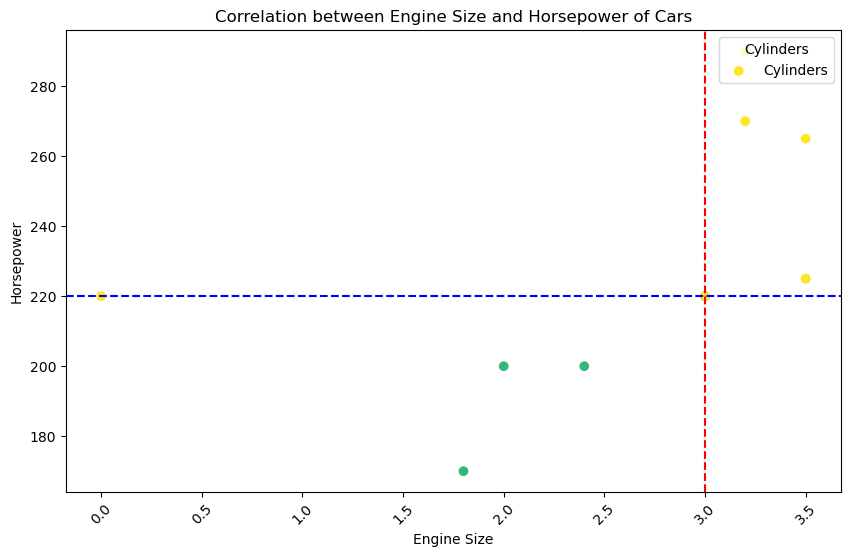

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Given imports
import io
import base64
import numpy as np

# Load the dataset
data = pd.read_csv('/home/preethi/projects/evadb-viz-generation/viz-cars-data/data/cars.csv')

# Plan - Generate a scatter plot of engine size vs. horsepower
def plot(data: pd.DataFrame):
    # Stub - Scatter plot with legend and labels
    plt.figure(figsize=(10, 6))
    plt.scatter(data['engine_size'], data['horsepower'], c=data['cyl'], cmap='viridis', label='Cylinders')
    plt.xlabel('Engine Size')
    plt.ylabel('Horsepower')
    plt.title('Correlation between Engine Size and Horsepower of Cars')
    
    # Add legend with various colors
    legend = plt.legend(title='Cylinders', loc='upper right')
    legend.get_title().set_fontsize('10')

    # Add vertical line for median engine size
    median_engine_size = data['engine_size'].median()
    plt.axvline(x=median_engine_size, color='r', linestyle='--', label=f'Median Engine Size: {median_engine_size:.2f}')
    
    # Add horizontal line for median horsepower
    median_horsepower = data['horsepower'].median()
    plt.axhline(y=median_horsepower, color='b', linestyle='--', label=f'Median Horsepower: {median_horsepower:.2f}')
    
    # Set x-axis labels legible
    plt.xticks(rotation=45)
    
    # Return the Matplotlib object
    return plt

# Generate the chart
chart = plot(data)


In [2]:
cursor = evadb.connect().cursor()
print("Connected to EvaDB")

Connected to EvaDB


In [3]:
create_function_query = f"""CREATE FUNCTION IF NOT EXISTS Visualize
            IMPL  './functions/visualize.py';
            """
cursor.query("DROP FUNCTION IF EXISTS Visualize;").execute()
cursor.query(create_function_query).execute()
print("Created Function")

create_table_query = """
CREATE TABLE IF NOT EXISTS CARS (
name TEXT(255),
type TEXT(255),
awd TEXT(255),
rwd TEXT(255),
retail_price INTEGER,
dealer_cost INTEGER,
engine_size FLOAT(64,64),
cyl INTEGER,
horsepower INTEGER,
city_mpg INTEGER,
highway_mpg INTEGER,
weight INTEGER,
wheel_base INTEGER,
len INTEGER,
width INTEGER
);
"""

load_data_query = f""" LOAD CSV 'viz-cars-data/data/cars.csv' INTO CARS;""" 


11-13-2023 19:54:50 WARNING[drop_object_executor:drop_object_executor.py:_handle_drop_function:0086] Function Visualize does not exist, therefore cannot be dropped.


Created Function


Create table and load data:

In [4]:
cursor.query(create_table_query).execute()
cursor.query(load_data_query).execute()

Check cost of Data Labeling:

In [6]:
query= f""" SELECT Visualize(name,type,awd,rwd,retail_price,dealer_cost,engine_size,cyl,horsepower,city_mpg,highway_mpg,weight,wheel_base,len,width) FROM CARS;"""
result = cursor.query(query).execute()

/home/preethi/projects/evadb-auto-label/dataframe/labeling_agent.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df


Total cost of labeling would be: $ 0.0020405


Perform Data Labeling:

In [7]:
query= f""" SELECT Visualize("run", comment_id, author, date, content) FROM CARS;"""

result = cursor.query(query).execute()
print(result)

/home/preethi/projects/evadb-auto-label/dataframe/labeling_agent.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.df = df


Now I want you to label the following comments:
Input: Could you please check out my covers on my channel? I do covers like Adele, Kodaline, Imagine Dragons...and more. Please if you could spare a few minutes,  could you have a listen to one or two of my covers , Feel free to comment and subscribe :) Thank you! 
Input: Like﻿
Input: I liked<br />﻿
Input: i love u  shakira﻿
Input: Message :   GTA V  $20  FIFA 14 $15  PS4  $200  Galaxy S4 mini $250  Ipad 4   $200  visit the site hh.nl
Input: I always have goose bumps at that part
Input: I really am madly in love with this woman!!﻿
Input: OMG LOVE THIS!
Input: Check out this playlist on YouTube<br />﻿
Input: Love you shkira﻿
Input: Your a fucking bitch
Input: I swear Shakira keeps getting more and more gorgeous! She definitely looks more gorgeous with her hair this way than super curly.﻿
Input: Please go in and see our Channel and subscribe :-). It would be Nice mate.
Input: Hey guys whats up? I found this app that lets you get free gift c

Validate results

In [9]:
import pandas as pd

def compare_csv_files(test_csv, validate_csv):
    label_df = pd.read_csv(test_csv)
    ground_truth = pd.read_csv(validate_csv)
    are_equal = (label_df['class'] == ground_truth['class']).all()
    return are_equal

test_csv = 'spam-ham-label/data/labeled_data.csv'
validate_csv = 'spam-ham-label/data/validate.csv'

if compare_csv_files(test_csv, validate_csv):
    print("The labeled data CSV is the same as the validate CSV.")
else:
    print("The labeled data CSV is different from the validate CSV.")


The labeled data CSV is different from the validate CSV.
